# Landcover

##Import Library

In [ ]:
import os
import ee
import numpy as np
import pandas as pd
import time
import glob
import re

In [ ]:

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=dY_QTjE71BfhUOnQt9uL3q0w-zlG9c-ftaF4ks7o0Ps&tc=Py4I7VmzqX88wWp116gtSud376EOQ0TfhtT8QuFNPvk&cc=gCUsNLUxCG5b6QG9WrSXikvd_17p_t_FqsP7ttBgBvU

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AWtgzh4EkiAjPKsTopZ-DFWC74JTZ31_eh6o4u-BGUoKUueOLdxvXmB8_9Y

Successfully saved authorization token.


##Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
eachfire='/content/gdrive/MyDrive/Thesis/data_output.csv'
eachfire = pd.read_csv(eachfire)
eachfire.drop(['Unnamed: 0','Unnamed: 0.1'], inplace=True, axis=1)


In [ ]:
eachfire

lat         lon      x     y   H  V    i    j       dtime  \
0        19.437500 -155.084888   4050  8467   3  7   67  450  2014-01-01   
1        19.437500 -155.076051   4051  8467   3  7   67  451  2014-01-01   
2        19.437500 -155.067214   4052  8467   3  7   67  452  2014-01-01   
3        19.437500 -155.058377   4053  8467   3  7   67  453  2014-01-01   
4        19.429167 -155.085766   4049  8468   3  7   68  449  2014-01-01   
...            ...         ...    ...   ...  .. ..  ...  ...         ...   
1432550  33.029167  -79.879981  13563  6836  11  5  836  363  2019-12-31   
1432551  33.020833  -79.892306  13561  6837  11  5  837  361  2019-12-31   
1432552  33.020833  -79.882368  13562  6837  11  5  837  362  2019-12-31   
1432553  33.020833  -79.872429  13563  6837  11  5  837  363  2019-12-31   
1432554  33.012500  -79.884756  13561  6838  11  5  838  361  2019-12-31   

         conf  maxFRP satellite                  neigh     t  \
0           9    1476       MYD  cloud (land or water)  4383   
1           9    1476       MYD  cloud (land or water)  4383   
2           9     955       MYD  cloud (land or water)  4383   
3           9     955       MYD  cloud (land or water)  4383   
4           9     299       MYD  cloud (land or water)  4383   
...       ...     ...       ...                    ...   ...   
1432550     8     136       MYD    non-fire land pixel  6573   
1432551     7     107       MYD   non-fire water pixel  6573   
1432552     8     136       MYD   non-fire water pixel  6573   
1432553     8     136       MYD    non-fire land pixel  6573   
1432554     7     107       MYD   non-fire water pixel  6573   

                          country      continent  neigh_int       gl        cp  
0        United States of America  North America          3     2919     32636  
1        United States of America  North America          3     2956     32636  
2        United States of America  North America          3     2996     32636  
3        United States of America  North America          3     3034     32636  
4        United States of America  North America          3     2884     32636  
...                           ...            ...        ...      ...       ...  
1432550  United States of America  North America          5  4027916  10248728  
1432551  United States of America  North America          4  4024780  10248728  
1432552  United States of America  North America          4  4026335  10248728  
1432553  United States of America  North America          5  4027917  10248728  
1432554  United States of America  North America          4  4024781  10248728  

[1432555 rows x 19 columns]

## Interest Part

In [ ]:
land_data = eachfire[['lon', 'lat','dtime','cp']].copy()

In [ ]:
new_land_data = land_data.drop_duplicates(
    subset=['cp','dtime'],
    keep='last').reset_index(drop=True).sort_values(['cp','dtime'])

new_land_data

lon        lat       dtime        cp
217156 -154.932895  19.454167  2018-05-30        11
217182 -154.881637  19.437500  2018-05-31        11
217250 -154.871030  19.454167  2018-06-01        11
217321 -154.889588  19.445833  2018-06-02        11
217392 -154.891362  19.429167  2018-06-03        11
...            ...        ...         ...       ...
76317   -96.588897  32.287500  2015-08-23  36526726
152617  -94.693694  42.270833  2017-03-09  36526808
175666  -97.806507  48.470833  2017-08-30  36527114
76318   -94.459538  31.695833  2015-08-23  36527218
76322   -95.860392  30.045833  2015-08-23  36527322

[279960 rows x 4 columns]

In [ ]:
##spilt data so easy to extract and avoid error while chatch
list_df = np.array_split(new_land_data, 120)

In [ ]:
list_df

[               lon        lat       dtime    cp
 217156 -154.932895  19.454167  2018-05-30    11
 217182 -154.881637  19.437500  2018-05-31    11
 217250 -154.871030  19.454167  2018-06-01    11
 217321 -154.889588  19.445833  2018-06-02    11
 217392 -154.891362  19.429167  2018-06-03    11
 ...            ...        ...         ...   ...
 168125 -112.725058  37.654167  2017-06-26  3315
 168251 -112.735583  37.654167  2017-06-27  3315
 228287 -110.591077  43.045833  2018-09-15  3347
 228414 -110.500442  43.020833  2018-09-16  3347
 228506 -110.523239  43.020833  2018-09-17  3347
 
 [2333 rows x 4 columns],                lon        lat       dtime     cp
 228690 -110.375061  43.020833  2018-09-18   3347
 228919 -110.496844  43.012500  2018-09-19   3347
 229146 -110.429109  42.987500  2018-09-20   3347
 229378 -110.406325  42.987500  2018-09-21   3347
 229490 -110.444083  42.995833  2018-09-22   3347
 ...            ...        ...         ...    ...
 205978  -81.555466  25.995833  201

Extracting data from MODIS/006/MCD12Q1

In [ ]:
#Test for 1 location (SRTM)
#Connect to satelite image collection
lc = ee.ImageCollection('MODIS/006/MCD12Q1')
scale = 1000  # scale in meters
u_lon = -79.88475594307026
u_lat = 33.012499997035384
u_poi = ee.Geometry.Point(u_lon, u_lat)
lc_result = lc.sample(u_poi, scale).first().get('LC_Type1').getInfo()
print(lc_result)

8


In [ ]:
#Connect to satelite image SRTM
lc = ee.ImageCollection('MODIS/006/MCD12Q1')
scale = 1000  # scale in meters

#Function grab info from satelite image collection
def landcover (lon,lat):
  u_poi = ee.Geometry.Point(lon, lat)
  try:
    lc_result = lc.first().sample(u_poi, scale).first().get('LC_Type1').getInfo()
  except:
    lc_result = 'Nan'
  return lc_result

In [ ]:
#Manipulating time to conect with server.
n = 54
while n <= 60:
  nodess = list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat','date','cp'])
  #Call Function
  df['landcover'] = df.apply(lambda x: landcover(x['lon'], x['lat']), axis=1)
  no = str(n)
  #save to file
  df.to_csv('/content/gdrive/MyDrive/Thesis/landcover_dir'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 60:
    break


54already
55already
56already
57already
58already
59already


In [ ]:
#Manipulating time to conect with server.
n = 110
while n <= 120:
  nodess = list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat','date','cp'])
  #Call Function
  df['landcover'] = df.apply(lambda x: landcover(x['lon'], x['lat']), axis=1)
  no = str(n)
  #save to file
  df.to_csv('/content/gdrive/MyDrive/Thesis/landcover_dir'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 120:
    break


110already
111already
112already
113already
114already
115already
116already
117already
118already
119already


In [ ]:
#Manipulating time to conect with server.
n = 105
while n <= 110:
  nodess = list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat','date','cp'])
  #Call Function
  df['landcover'] = df.apply(lambda x: landcover(x['lon'], x['lat']), axis=1)
  no = str(n)
  #save to file
  df.to_csv('/content/gdrive/MyDrive/Thesis/landcover_dir'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 110:
    break


105already
106already
107already
108already
109already


In [ ]:
#Manipulating time to conect with server.
n = 97
while n <= 98:
  nodess = list_df[n].values.tolist()
  df = pd.DataFrame (nodess, columns = ['lon', 'lat','date','cp'])
  #Call Function
  df['landcover'] = df.apply(lambda x: landcover(x['lon'], x['lat']), axis=1)
  no = str(n)
  #save to file
  df.to_csv('/content/gdrive/MyDrive/Thesis/landcover_dir'+ no +'.csv')
  time.sleep(5)
  print(no+'already')
  n += 1
  if n == 98:
    break


97already


##collecting data

In [ ]:
# Looking all files
files = os.path.join("/content/gdrive/MyDrive/Thesis/", "landcover_dir*.csv")

In [ ]:
# Sorted, list all files and glob the files

files = glob.glob(files)
files = sorted(files, key=lambda x:float(re.findall("(\d+)",x)[0]))
files

['/content/gdrive/MyDrive/Thesis/landcover_dir0.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir1.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir2.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir3.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir4.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir5.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir6.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir7.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir8.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir9.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir10.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir11.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir12.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir13.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir14.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir15.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir16.csv',
 '/content/gdrive/MyDrive/Thesis/landcover_dir17.csv',
 '/content/gdrive/My

In [ ]:
landcover_complete = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
landcover_complete.drop(['Unnamed: 0'], inplace=True, axis=1)
#lupa ganti nama pas tarik data
landcover_complete.rename(columns={'elevation': 'landcover'}, inplace=True)

In [ ]:
landcover_complete

lon        lat        date        cp landcover
0      -154.932895  19.454167  2018-05-30        11         2
1      -154.881637  19.437500  2018-05-31        11         2
2      -154.871030  19.454167  2018-06-01        11         2
3      -154.889588  19.445833  2018-06-02        11         8
4      -154.891362  19.429167  2018-06-03        11         8
...            ...        ...         ...       ...       ...
279955  -96.588897  32.287500  2015-08-23  36526726        10
279956  -94.693694  42.270833  2017-03-09  36526808        12
279957  -97.806507  48.470833  2017-08-30  36527114        12
279958  -94.459538  31.695833  2015-08-23  36527218         8
279959  -95.860392  30.045833  2015-08-23  36527322        10

[279960 rows x 5 columns]

## Read Wind + Elevation data

In [ ]:
## loading Wind data
wind_ele_data='/content/gdrive/MyDrive/Thesis/Wind+Elevation.csv'
wind_ele_data = pd.read_csv(wind_ele_data)
wind_ele_data.drop(['Unnamed: 0'], inplace=True, axis=1)


In [ ]:
wind_ele_data.sort_values(['cp','date'])

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed  
0        47.02184700068143 degree    4.172772  
1       47.515661076996146 degree    4.545328  
2        42.67737631913129 degree    3.362955  
3       54.189122824377094 degree    3.075476  
4         59.7343020693647 degree    3.209143  
...                           ...         ...  
279955   183.3791969987351 degree    3.053434  
279956   40.08355088918048 degree    3.927866  
279957  25.529026682813267 degree    3.839456  
279958  200.67440348868902 degree    2.168040  
279959  183.15345088172876 degree    2.030981  

[279960 rows x 7 columns]

In [ ]:
new_df = pd.merge(wind_ele_data, landcover_complete,  how='left', left_on=['cp','date','lon','lat'], right_on = ['cp','date','lon','lat'])

In [ ]:
new_df

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed landcover  
0        47.02184700068143 degree    4.172772         2  
1       47.515661076996146 degree    4.545328         2  
2        42.67737631913129 degree    3.362955         2  
3       54.189122824377094 degree    3.075476         8  
4         59.7343020693647 degree    3.209143         8  
...                           ...         ...       ...  
279955   183.3791969987351 degree    3.053434        10  
279956   40.08355088918048 degree    3.927866        12  
279957  25.529026682813267 degree    3.839456        12  
279958  200.67440348868902 degree    2.168040         8  
279959  183.15345088172876 degree    2.030981        10  

[279960 rows x 8 columns]

In [ ]:
new_df.to_csv('/content/gdrive/MyDrive/Thesis/Wind+Elevation+landcover.csv')

In [ ]:
new_df='/content/gdrive/MyDrive/Thesis/Wind+Elevation+landcover.csv'
new_df = pd.read_csv(new_df)
new_df.drop(['Unnamed: 0'], inplace=True, axis=1)


In [ ]:
new_df

lon        lat        date        cp  elevation  \
0      -154.932895  19.454167  2018-05-30        11      309.0   
1      -154.881637  19.437500  2018-05-31        11       52.0   
2      -154.871030  19.454167  2018-06-01        11       66.0   
3      -154.889588  19.445833  2018-06-02        11       94.0   
4      -154.891362  19.429167  2018-06-03        11       56.0   
...            ...        ...         ...       ...        ...   
279955  -96.588897  32.287500  2015-08-23  36526726      148.0   
279956  -94.693694  42.270833  2017-03-09  36526808      368.0   
279957  -97.806507  48.470833  2017-08-30  36527114      345.0   
279958  -94.459538  31.695833  2015-08-23  36527218       88.0   
279959  -95.860392  30.045833  2015-08-23  36527322       72.0   

                   wind_direction  wind_speed landcover  
0        47.02184700068143 degree    4.172772         2  
1       47.515661076996146 degree    4.545328         2  
2        42.67737631913129 degree    3.362955         2  
3       54.189122824377094 degree    3.075476         8  
4         59.7343020693647 degree    3.209143         8  
...                           ...         ...       ...  
279955   183.3791969987351 degree    3.053434        10  
279956   40.08355088918048 degree    3.927866        12  
279957  25.529026682813267 degree    3.839456        12  
279958  200.67440348868902 degree    2.168040         8  
279959  183.15345088172876 degree    2.030981        10  

[279960 rows x 8 columns]

In [ ]:
new_df.groupby(['landcover']).size().sort_values(ascending=False).reset_index(name='counts')

landcover  counts
0          8   68159
1         12   60904
2         10   49886
3          9   34231
4          4   16419
5         13   12091
6          1   11981
7          2    7875
8          5    6297
9          7    3818
10        14    3222
11        16    3053
12        11     832
13       Nan     475
14         6     306
15        17     264
16        15     147

<Axes: >

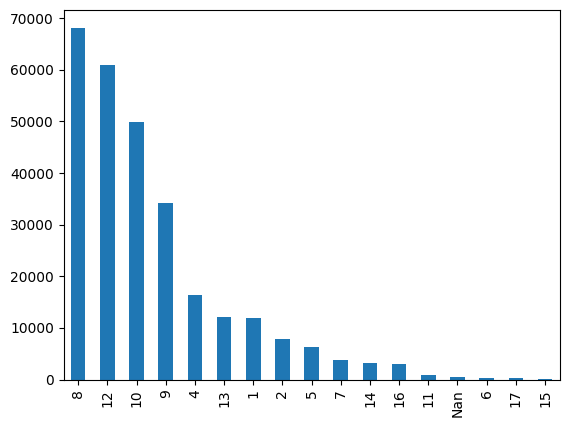

In [ ]:
new_df.landcover.value_counts().plot(kind='bar')